In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_email = pd.read_csv('hw3Data/emails.csv', header=0).values[:,1:].astype(np.int32)

In [3]:
def euclidean_distances(train_data, test_instance):
    return np.sqrt(np.sum((train_data - test_instance) ** 2, axis=1))

def kNN(train_data, train_label, test_data, k):
    distances = euclidean_distances(train_data, test_data)
    k_nearest_indices = distances.argsort()[:k]
    k_nearest_labels = train_label[k_nearest_indices]

    count_ones = np.sum(k_nearest_labels == 1)
    count_zeros = k - count_ones

    predicted_label = 1 if count_ones > count_zeros else 0
    return predicted_label

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

In [4]:
X = data_email[:,:-1]
y = data_email[:,-1]

split = 4000
X_train, y_train = X[:split,:], y[:split]
X_test, y_test = X[split:,:], y[split:] 

y_pred_knn = []
correct_predictions = 0
for i in range(len(X_test)):
    test_instance = X_test[i]
    prediction = kNN(X_train, y_train, test_instance, 5)
    if prediction == y_test[i]:
        correct_predictions += 1
    y_pred_knn.append(prediction)

accuracy_knn = correct_predictions / len(X_test)        
print(f"kNN Accuracy: {accuracy_knn*100:.2f}%")

kNN Accuracy: 78.00%


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    for _ in range(epochs):
        h = sigmoid(X @ theta)
        gradient = 1/m * X.T @ (h - y)
        theta = theta - alpha * gradient
    return theta

def predict(X, theta):
    return sigmoid(X @ theta) >= 0.5

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [6]:
X = data_email[:,:-1]
y = data_email[:,-1]
X = np.hstack((np.ones((X.shape[0], 1)), X))

theta_init = np.zeros(X.shape[1])

alpha = 0.001
epochs = 1000

split = 4000
X_train, y_train = X[:split,:], y[:split]
X_test, y_test = X[split:,:], y[split:] 
    
theta = gradient_descent(X_train, y_train, theta_init, alpha, epochs)
y_pred_lr  = predict(X_test, theta)

accuracy_lr = accuracy(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr*100:.2f}%")

Logistic Regression Accuracy: 84.90%


In [7]:
def kNN_probs(X_train, y_train, X_test, k):
    distances = np.array([np.linalg.norm(X_train - x, axis=1) for x in X_test])
    k_indices = np.argsort(distances, axis=1)[:, :k]
    k_labels = np.array([[y_train[i] for i in idx] for idx in k_indices])
    return np.mean(k_labels, axis=1)

def roc_curve(y_true, y_scores):
    thresholds = np.linspace(0, 1, 100)
    TPRs = []
    FPRs = []
    
    for thresh in thresholds:
        y_pred = (y_scores >= thresh).astype(int)
        TP = np.sum((y_true == 1) & (y_pred == 1))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        TN = np.sum((y_true == 0) & (y_pred == 0))
        FN = np.sum((y_true == 1) & (y_pred == 0))
        
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        TPRs.append(TPR)
        FPRs.append(FPR)
    
    return FPRs, TPRs

In [9]:
lr_probs = sigmoid(X_test @ theta)
knn_probs = kNN_probs(X_train, y_train, X_test, 5)

FPR_lr, TPR_lr = roc_curve(y_test, lr_probs)
FPR_knn, TPR_knn = roc_curve(y_test, knn_probs)

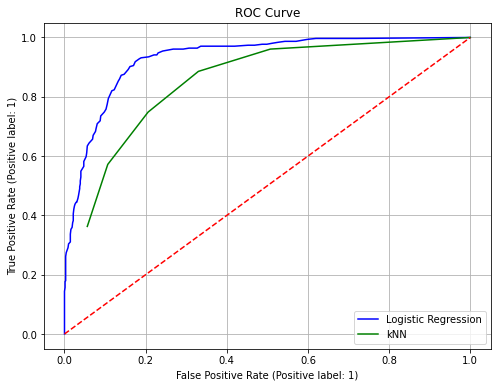

In [10]:
fig3 = plt.figure(figsize=(8, 6))
plt.plot(FPR_lr, TPR_lr, label='Logistic Regression', color='blue')
plt.plot(FPR_knn, TPR_knn, label='kNN', color='green')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate (Positive label: 1)')
plt.ylabel('True Positive Rate (Positive label: 1)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
fig3.savefig('P2.5_ROC_curve.png')